In [8]:
#pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=16a674c7f7fdd679d8b002675142afcfe71121ffa4a26a011a963266e684e5f5
  Stored in directory: c:\users\sdleslie\appdata\local\pip\cache\wheels\72\ae\63\5d03cf6dfe5c0e9328fb73f8b30da1948a06b9cceaf2c68d2d
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


## Weather Trends
#### In looking at the scatter plots below we some interesting findings.  1) Temperature is highly dependent on Latitude with a high r squared value (around 0.6).  2) Humidity on the other hand as a 0 r squared value which would indicate no relation of humidity and latitude.  But looking at the Southern hemisphere scatter plot we we a large grouping of data points at the top right indicating that there is higher humidity near the equator that we don't see in the Northen hemisphere.  This may be due to the continent shapes of Soth Ameria and Africa whichi narrow as you so south versus Eurasia and North America which do the opposite.  Overall Southern and Northern hemisphere weather shows very similar trends except of the humidity phenomena.  3) The cloudiness scatter is highly intersting as there are so many places with 0% or 100% cloudiness though humidity doesn't follow this pattern.
### Extra Analysis
#### At the very bottom of the notebook is a plot that shows the relation between humidity and cloudiness to try to understand the differing behaviors we saw in the above charts. The shows a much lower regression result than would be expected yet the visual data cleary shows that cloudiness follows humidity as would be expected.

In [3]:
# Dependencies and Setup
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy import stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

In [5]:
# Weather API Config
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

In [6]:
city = 'rocha'
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
weather_response = requests.get(query_url)
weather_json = weather_response.json()
temperature = weather_json["main"]["temp"]
temperature

56.3

In [12]:
query_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1b4cf7e7e8c13416876990ebfd3fec44&q=rocha'

In [19]:
city_data = []

baseurl = f"{url}appid={weather_api_key}"
for i, city in enumerate(cities):
    cityurl = baseurl + '&q=' + city + '&units=Imperial'
    print('Processing Record ' + str(i) + ' of ' + city)
    try:
        weather_response = requests.get(cityurl)
        weather_json = weather_response.json()
        max_temp = weather_json["main"]["temp_max"]
        lat = weather_json["coord"]["lat"]
        lng = weather_json["coord"]["lon"]
        hum = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        windspeed = weather_json["wind"]["speed"]
        country = weather_json["sys"]["country"]
        date = weather_json["dt"]
        city_data.append({'City':city,
                         'Lat':lat,
                         'Lng':lng,
                         'Max_Temp':max_temp,
                         'Humidity':hum,
                         'Cloudiness':cloud,
                         'Wind Speed':windspeed,
                         'Country':country,
                          'Date':date
                         })
    except:
        print('City not found, skipping...')
        
    

Processing Record 0 of yeppoon
Processing Record 1 of grand gaube
Processing Record 2 of albany
Processing Record 3 of sungaipenuh
Processing Record 4 of puerto ayora
Processing Record 5 of lahat
Processing Record 6 of bambanglipuro
Processing Record 7 of rikitea
Processing Record 8 of busselton
Processing Record 9 of maiduguri
Processing Record 10 of vanavara
Processing Record 11 of hilo
Processing Record 12 of hermanus
Processing Record 13 of constitucion
Processing Record 14 of ahipara
Processing Record 15 of paamiut
Processing Record 16 of tuktoyaktuk
Processing Record 17 of srednekolymsk
Processing Record 18 of college
Processing Record 19 of victoria
Processing Record 20 of jambi
Processing Record 21 of hofn
Processing Record 22 of lagoa
Processing Record 23 of thompson
Processing Record 24 of vega de alatorre
Processing Record 25 of concepcion del oro
Processing Record 26 of longyearbyen
Processing Record 27 of tiksi
Processing Record 28 of nouadhibou
Processing Record 29 of sas

City not found, skipping...
Processing Record 228 of bose
Processing Record 229 of maumere
Processing Record 230 of broken hill
Processing Record 231 of yeovil
Processing Record 232 of pevek
Processing Record 233 of safaqis
City not found, skipping...
Processing Record 234 of yebaishou
Processing Record 235 of kholtoson
Processing Record 236 of svetlogorsk
Processing Record 237 of ust-uda
Processing Record 238 of bom jesus
Processing Record 239 of esperance
Processing Record 240 of bethel
Processing Record 241 of ngukurr
City not found, skipping...
Processing Record 242 of san quintin
Processing Record 243 of wasilla
Processing Record 244 of lichinga
Processing Record 245 of aguas belas
Processing Record 246 of alice springs
Processing Record 247 of ijaki
City not found, skipping...
Processing Record 248 of mlonggo
Processing Record 249 of sterling
Processing Record 250 of sambava
Processing Record 251 of vaitupu
City not found, skipping...
Processing Record 252 of sistranda
Processing

Processing Record 446 of tual
Processing Record 447 of along
Processing Record 448 of lompoc
Processing Record 449 of bathsheba
Processing Record 450 of chernyakhovsk
Processing Record 451 of mareeba
Processing Record 452 of skibbereen
Processing Record 453 of erzin
Processing Record 454 of whitehorse
Processing Record 455 of dien bien
City not found, skipping...
Processing Record 456 of chernyshevskiy
Processing Record 457 of vao
Processing Record 458 of leningradskiy
Processing Record 459 of andenes
Processing Record 460 of awjilah
Processing Record 461 of ixtapa
Processing Record 462 of houma
Processing Record 463 of egvekinot
Processing Record 464 of husavik
Processing Record 465 of qui nhon
Processing Record 466 of marsa matruh
Processing Record 467 of sumbe
Processing Record 468 of okhotsk
Processing Record 469 of uruguaiana
Processing Record 470 of tilichiki
Processing Record 471 of atar
Processing Record 472 of moroni
Processing Record 473 of meulaboh
Processing Record 474 of m

In [ ]:
# Convert to Dataframe
city_weather_df = pd.DataFrame(city_data)
city_weather_df

In [ ]:
# Inspect the data and remove the cities where the humidity > 100% (no rows found > 100%)
Humidityover100_df = city_weather_df[(city_weather_df.Humidity > 100)]
Humidityover100_df

In [ ]:
# Save to CSV - Working again!
output_file = city_weather_df.to_csv('citydata.csv', index=False)

## Recalling previously generated Weather Data (to save time)

In [ ]:
datapath = 'citydata.csv'
city_weather_df = pd.read_csv(datapath)
city_weather_df

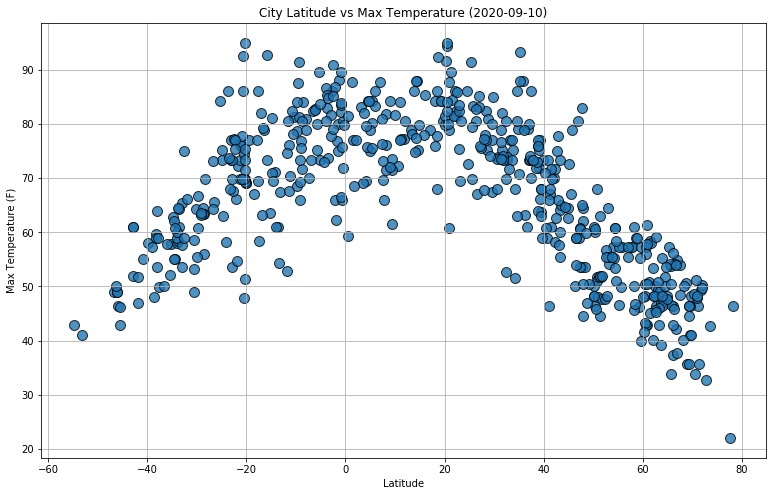

In [8]:
chart_title = "City Latitude vs Max Temperature (" + str(datetime.datetime.now().date()) + ")"
city_weather_df.plot(kind="scatter", x="Lat", y="Max_Temp",s = 99, grid=True, 
              figsize=(13,8), title = chart_title, alpha = 0.8, marker="o", edgecolor = "black")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
# plt.show()
plt.savefig(chart_title + '.png')

## The Scatter plots visualizes temperature in cities by Latitude.
#### As seen the cities in the far North and South are much lower than ciries near the equator (Latitude = 0).  The code pulls in a varierty of measurements by city from openweather api using Imperial Units

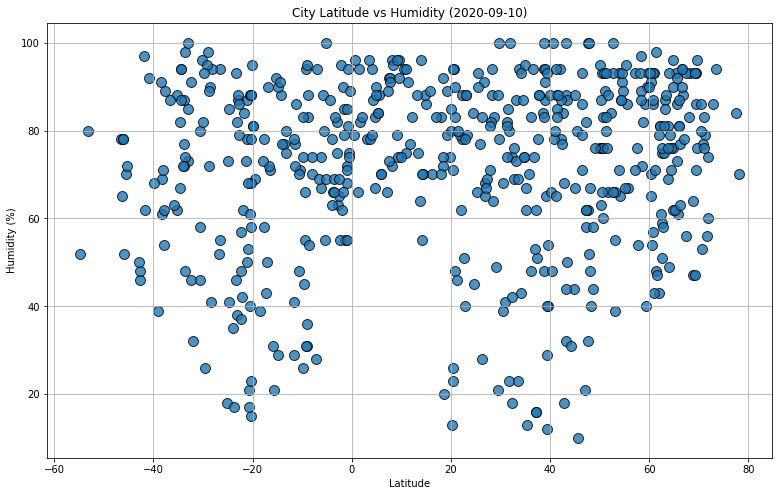

In [23]:
chart_title = "City Latitude vs Humidity (" + str(datetime.datetime.now().date()) + ")"
city_weather_df.plot(kind="scatter", x="Lat", y="Humidity",s = 99, grid=True, 
              figsize=(13,8), title = chart_title, alpha = 0.8, marker="o", edgecolor = "black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig(chart_title + '.png')

## This scatter plots Humidity versus Latitude.
#### Except for near the equator (where all data points show at least 40% but are clustered at 60% and above, humidity has a wide range across Latitudes

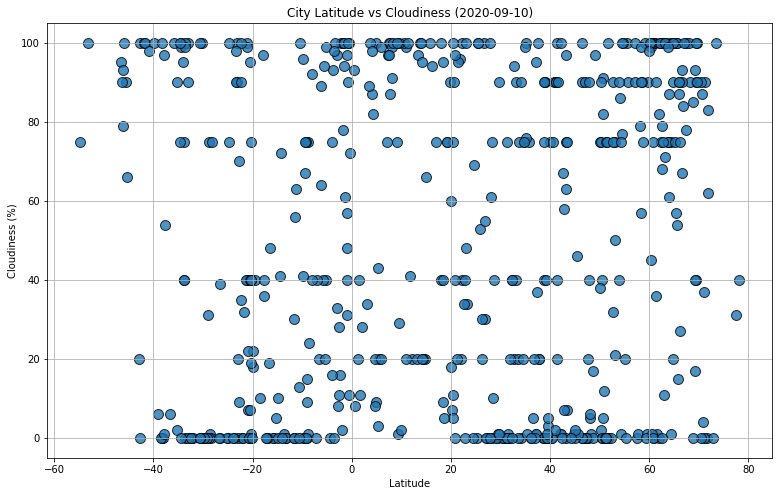

In [11]:
chart_title = "City Latitude vs Cloudiness (" + str(datetime.datetime.now().date()) + ")"
city_weather_df.plot(kind="scatter", x="Lat", y="Cloudiness",s = 99, grid=True, 
              figsize=(13,8), title = chart_title, alpha = 0.8, marker="o", edgecolor = "black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig(chart_title + '.png')

## This scatter plots Cloudiness versus Latitude.
#### Here we see many data points at 0 which means areas like So Cal or the Sahara desert that get no clouds (or rain).  There are also many points at 100% which is where the gloomy areas are like London (fog  = 100% Cloudiness AND 100% Humidity)

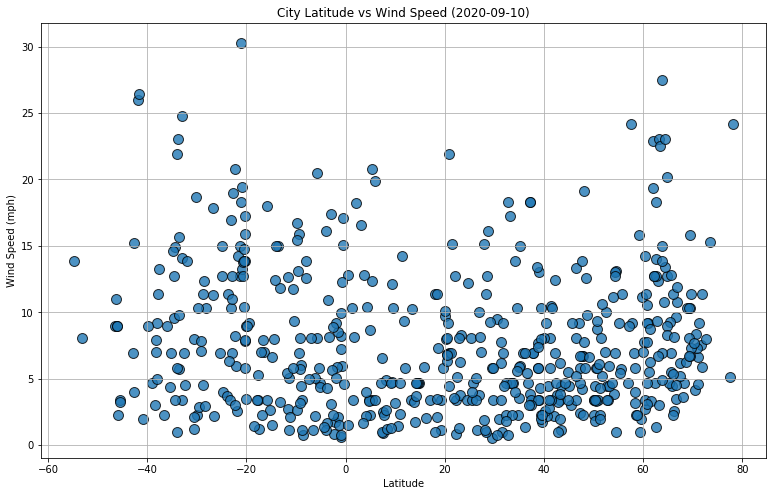

In [12]:
chart_title = "City Latitude vs Wind Speed (" + str(datetime.datetime.now().date()) + ")"
city_weather_df.plot(kind="scatter", x="Lat", y="Wind Speed",s = 99, grid=True, 
              figsize=(13,8), title = chart_title, alpha = 0.8, marker="o", edgecolor = "black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig(chart_title + '.png')

## This scatter plots Wind Speed versus Latitude.
#### There are a few cities that have such a high wind speed but that is likely due to a "windy day" at the time of data collection.  Therefore This scatter really doesn't tell us much. We would have to have a data over a longer period like a season to understand wind speed patterns.

In [13]:
# Create Southern hemi dataframe
so_city_weather_df = city_weather_df[(city_weather_df.Lat < 0)]
so_city_weather_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yeppoon,-23.13,150.73,77.00,38,90,10.29,AU,1599703307
1,grand gaube,-20.01,57.66,69.01,81,22,8.99,MU,1599703307
3,sungaipenuh,-2.08,101.38,65.88,95,100,1.74,ID,1599703308
4,puerto ayora,-0.74,-90.35,66.00,94,90,5.99,EC,1599703308
5,lahat,-3.80,103.53,82.90,66,93,1.66,ID,1599703308
...,...,...,...,...,...,...,...,...,...
536,majene,-3.54,118.97,84.78,66,0,10.94,ID,1599703465
538,le port,-20.94,55.29,69.80,68,22,19.46,RE,1599703466
543,kavieng,-2.57,150.80,85.19,69,28,8.86,PG,1599703467
545,santa cruz,-17.80,-63.17,77.00,73,97,3.36,BO,1599703468


In [14]:
# Create Northern hemi dataframe
no_city_weather_df = city_weather_df[(city_weather_df.Lat > 0)]
no_city_weather_df

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,albany,42.60,-73.97,75.00,84,67,3.74,US,1599703032
9,maiduguri,11.85,13.16,77.27,77,41,9.35,NG,1599703310
10,vanavara,60.34,102.28,50.47,65,45,2.68,RU,1599703310
11,hilo,19.73,-155.09,80.60,74,90,5.82,US,1599703210
15,paamiut,61.99,-49.67,40.06,79,82,22.93,GL,1599703312
...,...,...,...,...,...,...,...,...,...
540,havoysund,71.00,24.66,48.20,76,37,4.59,NO,1599703466
541,bilma,18.69,12.92,92.28,20,5,7.31,NE,1599703467
542,shihezi,44.30,86.03,64.65,31,0,4.70,CN,1599703467
544,hellvik,59.92,5.78,48.00,90,98,7.00,NO,1599703467


The r-squared is: 0.5652573449884749


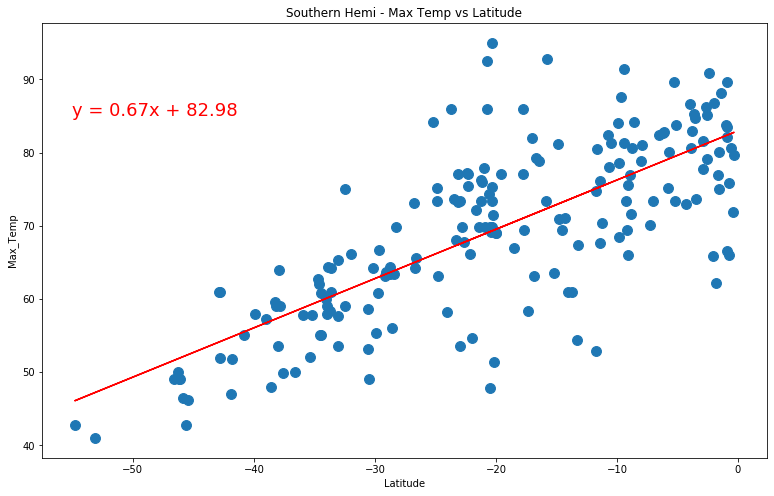

In [25]:
# Add the linear regression equation and line to plot for Southern hemi
chart_title = 'Southern Hemi - Max Temp vs Latitude'
x_values = so_city_weather_df['Lat']
y_values = so_city_weather_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
so_city_weather_df.plot(kind="scatter", x="Lat", y="Max_Temp",s = 98, grid=False, 
              figsize=(13,8), title = chart_title)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,85),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(chart_title + '.png')

The r-squared is: 0.6914153160434694


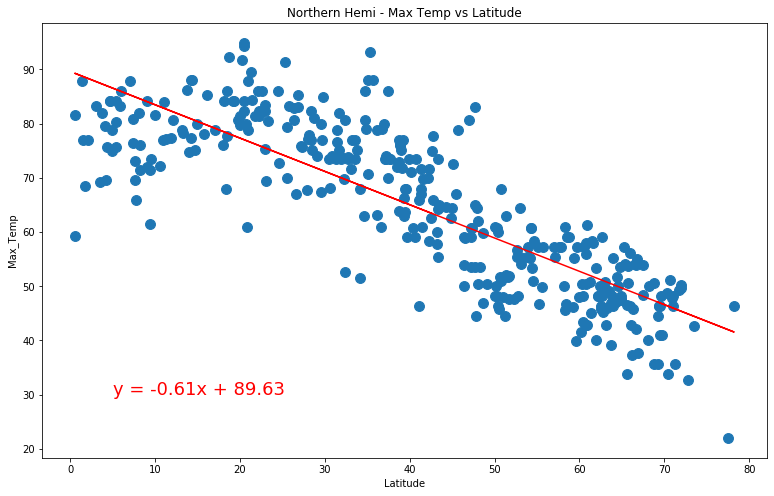

In [26]:
# Add the linear regression equation and line to plot for Northern hemi
chart_title = 'Northern Hemi - Max Temp vs Latitude'
x_values = no_city_weather_df['Lat']
y_values = no_city_weather_df['Max_Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
no_city_weather_df.plot(kind="scatter", x="Lat", y="Max_Temp",s = 98, grid=False, 
              figsize=(13,8), title = chart_title)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,30),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max_Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(chart_title + '.png')

The r-squared is: 1.1352688641843664e-05


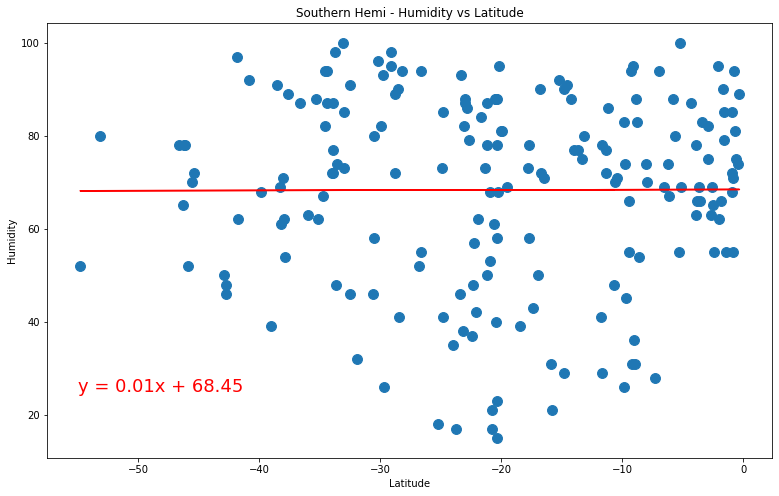

In [27]:
# Add the linear regression equation and line to plot for Southern hemi
chart_title = "Southern Hemi - Humidity vs Latitude"
x_values = so_city_weather_df['Lat']
y_values = so_city_weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
so_city_weather_df.plot(kind="scatter", x="Lat", y="Humidity",s = 98, grid=False, 
              figsize=(13,8), title = chart_title)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(chart_title + '.png')

The r-squared is: 0.00024428647823370207


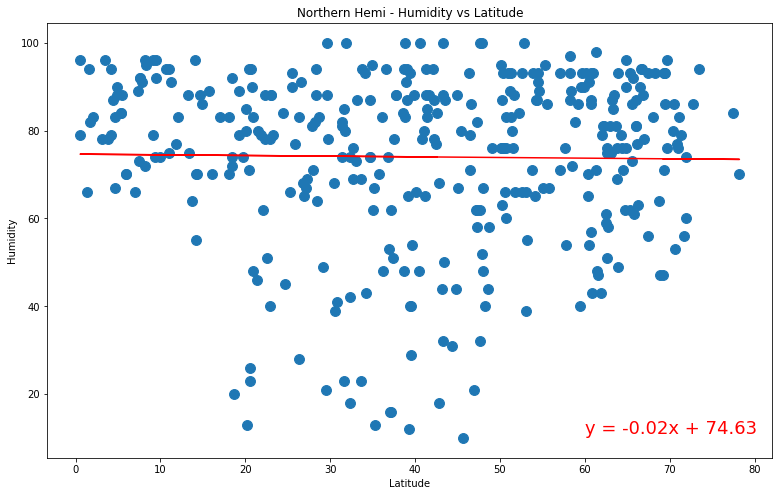

In [28]:
# Add the linear regression equation and line to plot for Northern hemi
chart_title = 'Northern Hemi - Humidity vs Latitude'
x_values = no_city_weather_df['Lat']
y_values = no_city_weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
no_city_weather_df.plot(kind="scatter", x="Lat", y="Humidity",s = 98, grid=False, 
              figsize=(13,8), title = chart_title)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,11),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(chart_title + '.png')

The r-squared is: 0.009147703723522183


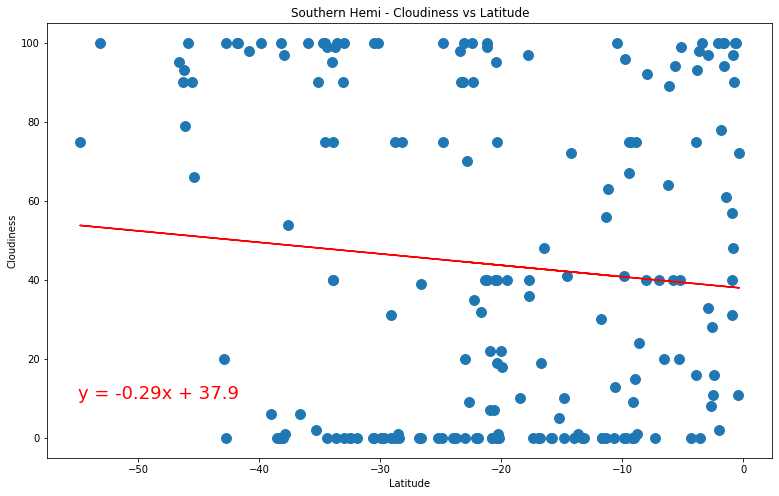

In [29]:
# Add the linear regression equation and line to plot for Southern hemi
chart_title = 'Southern Hemi - Cloudiness vs Latitude'
x_values = so_city_weather_df['Lat']
y_values = so_city_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
so_city_weather_df.plot(kind="scatter", x="Lat", y="Cloudiness",s = 98, grid=False, 
              figsize=(13,8), title = chart_title)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(chart_title + '.png')

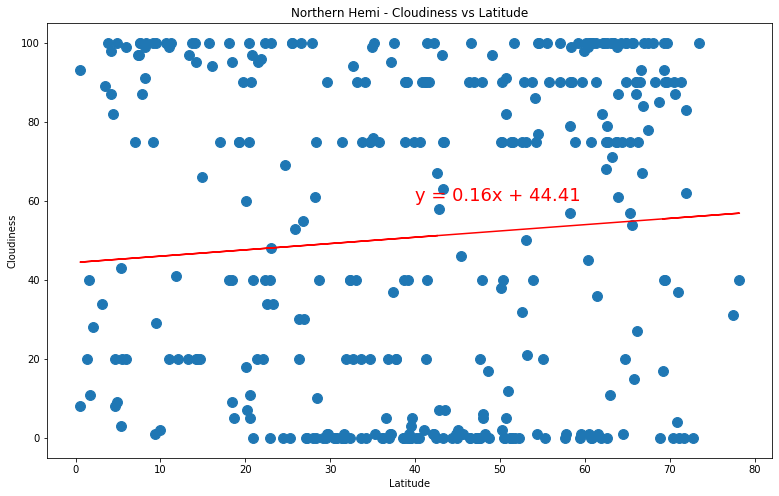

In [30]:
# Add the linear regression equation and line to plot for Northern hemi
chart_title = 'Northern Hemi - Cloudiness vs Latitude'
x_values = no_city_weather_df['Lat']
y_values = no_city_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
no_city_weather_df.plot(kind="scatter", x="Lat", y="Cloudiness",s = 98, grid=False, 
              figsize=(13,8), title = chart_title)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(chart_title + '.png')

The r-squared is: 0.028574633523202442


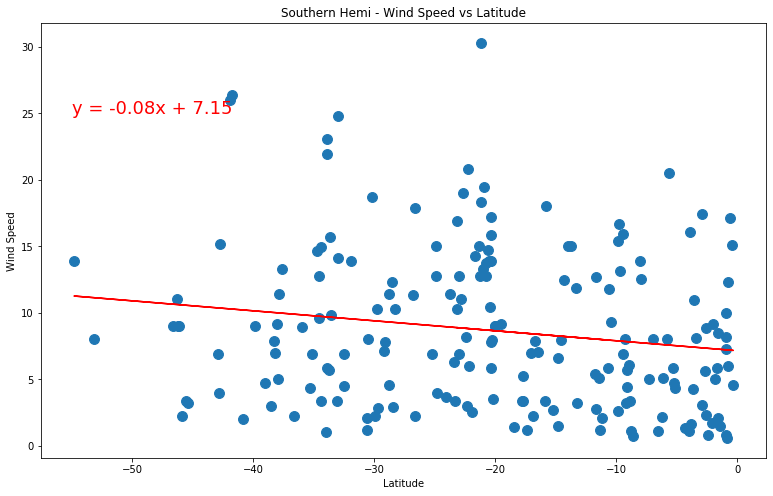

In [31]:
# Add the linear regression equation and line to plot for Southern hemi
chart_title = 'Southern Hemi - Wind Speed vs Latitude'
x_values = so_city_weather_df['Lat']
y_values = so_city_weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
so_city_weather_df.plot(kind="scatter", x="Lat", y="Wind Speed",s = 98, grid=False, 
              figsize=(13,8), title = chart_title)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(chart_title + '.png')

The r-squared is: 0.03667423099451117


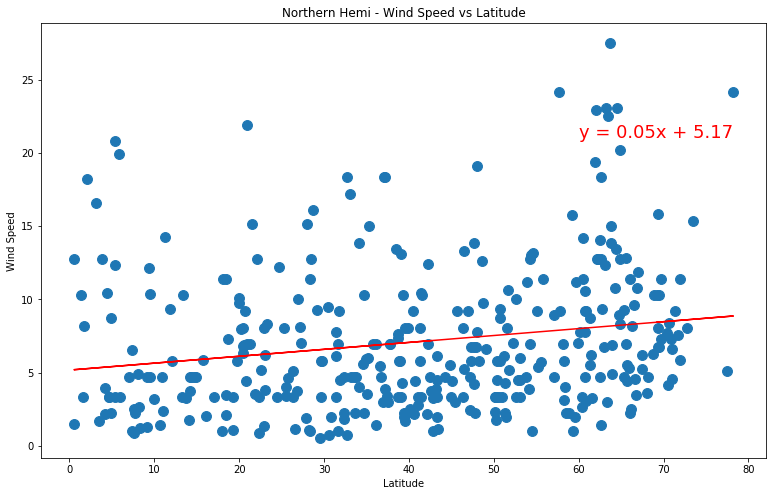

In [32]:
# Add the linear regression equation and line to plot for Northern hemi
chart_title = 'Northern Hemi - Wind Speed vs Latitude'
x_values = no_city_weather_df['Lat']
y_values = no_city_weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
no_city_weather_df.plot(kind="scatter", x="Lat", y="Wind Speed",s = 98, grid=False, 
              figsize=(13,8), title = chart_title)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,21),fontsize=18,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(chart_title + '.png')

## Extra Analysis
#### This plot shows the relation between humidity and cloudiness to try to understand the differing behaviors we saw in the above charts.  The shows a much lower regression result than would be expected yet the visual data clearly shows that cloudiness follows humidity as would be expected.

In [12]:
#city_weather_df = pd.read_csv('citydata.csv')
#city_weather_df

The r-squared is: 0.15534240587002157


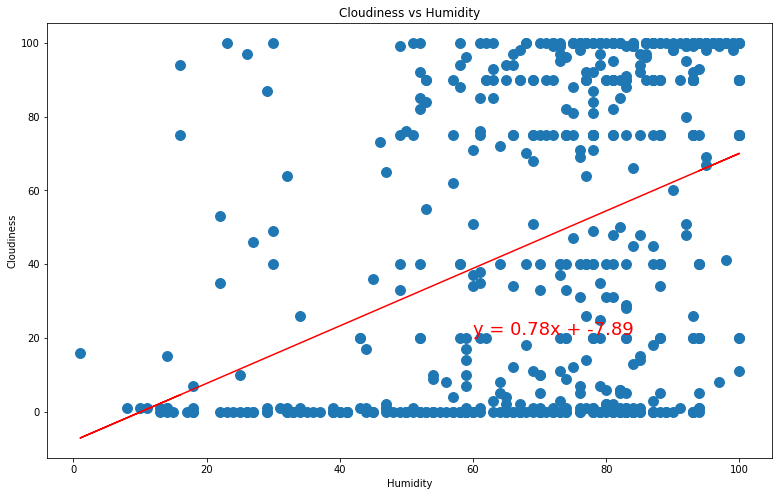

In [13]:
# Add the linear regression equation and line to plot for Northern hemi
chart_title = 'Cloudiness vs Humidity'
x_values = city_weather_df['Humidity']
y_values = city_weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
city_weather_df.plot(kind="scatter", x="Humidity", y="Cloudiness",s = 98, grid=False, 
              figsize=(13,8), title = chart_title)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,21),fontsize=18,color="red")
plt.xlabel('Humidity')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(chart_title + '.png')